In [1]:
from google.colab import drive # mounts the google drive for a new notebook 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# load the 2 npy files created by the process_yale_images.ipynb 
from numpy import load
import numpy as np
path = '/content/drive/My Drive/Colab Notebooks/'
# load array
y = load(path + 'yaleExtB_target.npy')
X = load(path + 'yaleExtB_data.npy')

In [3]:
from sklearn.model_selection import train_test_split # loads functions from the ML library sklearn 
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn import metrics # to show the accuracy of the classifier
from sklearn.model_selection import cross_val_score # K-Fold for any classifier
from matplotlib import pyplot as plt

In [4]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=26)

In [5]:
# PCA 
nof_prin_components = 200  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True, random_state=26).fit(X_train)
# applies PCA to the train and test images to calculate the principal components
X_pca = pca.transform(X)
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

[Documentation of ML sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [6]:
# delcaaring error to make a graph
accs = list()
nohns = list()
cross_vals = list()

In [7]:
# Train nerual network
# Show the accuracy
def train_nerual(nohn, solver_name, activation_name):
  print("Fitting the classifier to the training set")
  clf = MLPClassifier(hidden_layer_sizes=(nohn,), solver=solver_name, 
                      activation=activation_name, batch_size=256, verbose=True, random_state=26,
                    early_stopping=True).fit(X_train_pca, y_train)
  y_pred = clf.predict(X_test_pca) # reoognises the test images

  acc = metrics.accuracy_score(y_test, y_pred)
  
  clf_cross_val_result = cross_val_score(clf, X_pca, y, cv=5)
  cross_val = np.mean(clf_cross_val_result)

  print(classification_report(y_test, y_pred)) # the recognition accuracy

  print("Cross Validation Scores : ", clf_cross_val_result)
  print("Average Cross Validation Scores: ", cross_val)

  nohns.append(nohn)
  accs.append(acc)
  cross_vals.append(cross_val)

In [8]:
train_nerual(200, 'sgd', 'tanh')

Fitting the classifier to the training set
Iteration 1, loss = 3.70813294
Validation score: 0.039604
Iteration 2, loss = 3.69142636
Validation score: 0.039604
Iteration 3, loss = 3.66581714
Validation score: 0.039604
Iteration 4, loss = 3.63444835
Validation score: 0.049505
Iteration 5, loss = 3.59929907
Validation score: 0.049505
Iteration 6, loss = 3.56184333
Validation score: 0.049505
Iteration 7, loss = 3.52279290
Validation score: 0.049505
Iteration 8, loss = 3.48298869
Validation score: 0.049505
Iteration 9, loss = 3.44251834
Validation score: 0.059406
Iteration 10, loss = 3.40214683
Validation score: 0.059406
Iteration 11, loss = 3.36119164
Validation score: 0.059406
Iteration 12, loss = 3.32062421
Validation score: 0.059406
Iteration 13, loss = 3.27987032
Validation score: 0.059406
Iteration 14, loss = 3.23957603
Validation score: 0.079208
Iteration 15, loss = 3.19934715
Validation score: 0.079208
Iteration 16, loss = 3.15923881
Validation score: 0.089109
Iteration 17, loss = 3

In [9]:
train_nerual(250, 'sgd', 'tanh')

Fitting the classifier to the training set
Iteration 1, loss = 3.72245567
Validation score: 0.019802
Iteration 2, loss = 3.70454230
Validation score: 0.019802
Iteration 3, loss = 3.67705890
Validation score: 0.019802
Iteration 4, loss = 3.64350932
Validation score: 0.019802
Iteration 5, loss = 3.60596575
Validation score: 0.019802
Iteration 6, loss = 3.56583355
Validation score: 0.039604
Iteration 7, loss = 3.52376655
Validation score: 0.039604
Iteration 8, loss = 3.48117218
Validation score: 0.049505
Iteration 9, loss = 3.43810847
Validation score: 0.059406
Iteration 10, loss = 3.39446360
Validation score: 0.059406
Iteration 11, loss = 3.35101786
Validation score: 0.059406
Iteration 12, loss = 3.30729167
Validation score: 0.059406
Iteration 13, loss = 3.26414805
Validation score: 0.059406
Iteration 14, loss = 3.22104856
Validation score: 0.059406
Iteration 15, loss = 3.17789588
Validation score: 0.059406
Iteration 16, loss = 3.13498430
Validation score: 0.079208
Iteration 17, loss = 3

In [10]:
train_nerual(300, 'sgd', 'tanh')

Fitting the classifier to the training set
Iteration 1, loss = 3.65616580
Validation score: 0.029703
Iteration 2, loss = 3.63664351
Validation score: 0.029703
Iteration 3, loss = 3.60682122
Validation score: 0.029703
Iteration 4, loss = 3.57023617
Validation score: 0.029703
Iteration 5, loss = 3.52915902
Validation score: 0.029703
Iteration 6, loss = 3.48567446
Validation score: 0.029703
Iteration 7, loss = 3.44023032
Validation score: 0.029703
Iteration 8, loss = 3.39371393
Validation score: 0.039604
Iteration 9, loss = 3.34669997
Validation score: 0.039604
Iteration 10, loss = 3.29956278
Validation score: 0.039604
Iteration 11, loss = 3.25230518
Validation score: 0.049505
Iteration 12, loss = 3.20508266
Validation score: 0.049505
Iteration 13, loss = 3.15834900
Validation score: 0.059406
Iteration 14, loss = 3.11144237
Validation score: 0.069307
Iteration 15, loss = 3.06485211
Validation score: 0.079208
Iteration 16, loss = 3.01894870
Validation score: 0.079208
Iteration 17, loss = 2

In [11]:
train_nerual(350, 'sgd', 'tanh')

Fitting the classifier to the training set
Iteration 1, loss = 3.72941878
Validation score: 0.009901
Iteration 2, loss = 3.70822432
Validation score: 0.009901
Iteration 3, loss = 3.67570228
Validation score: 0.009901
Iteration 4, loss = 3.63582413
Validation score: 0.019802
Iteration 5, loss = 3.59140361
Validation score: 0.019802
Iteration 6, loss = 3.54370220
Validation score: 0.019802
Iteration 7, loss = 3.49430028
Validation score: 0.019802
Iteration 8, loss = 3.44379344
Validation score: 0.029703
Iteration 9, loss = 3.39275794
Validation score: 0.029703
Iteration 10, loss = 3.34122257
Validation score: 0.039604
Iteration 11, loss = 3.28995424
Validation score: 0.039604
Iteration 12, loss = 3.23875569
Validation score: 0.049505
Iteration 13, loss = 3.18748402
Validation score: 0.069307
Iteration 14, loss = 3.13662401
Validation score: 0.089109
Iteration 15, loss = 3.08592478
Validation score: 0.118812
Iteration 16, loss = 3.03576178
Validation score: 0.138614
Iteration 17, loss = 2

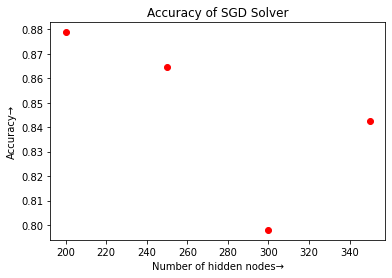

In [12]:
# Now let's plot the accuracy

plt.plot(nohns, accs, 'ro')
plt.xlabel('Number of hidden nodes' + u"\u2192")
plt.ylabel('Accuracy' + u"\u2192")
plt.title('Accuracy of SGD Solver')
plt.show()

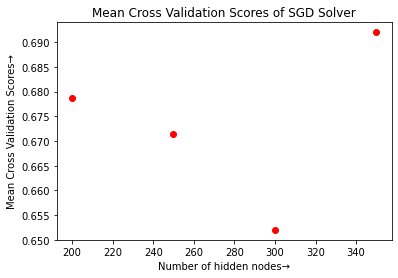

In [13]:
# Now plot cross validation

plt.plot(nohns, cross_vals, 'ro')
plt.xlabel('Number of hidden nodes' + u"\u2192")
plt.ylabel('Mean Cross Validation Scores' + u"\u2192")
plt.title('Mean Cross Validation Scores of SGD Solver')
plt.show()

In [14]:
# Clearing the stored values
accs = list()
nohns = list()
cross_vals = list()

In [15]:
train_nerual(200, 'sgd', 'relu')

Fitting the classifier to the training set
Iteration 1, loss = 3.82946240
Validation score: 0.029703
Iteration 2, loss = 3.81019151
Validation score: 0.029703
Iteration 3, loss = 3.78123450
Validation score: 0.029703
Iteration 4, loss = 3.74586530
Validation score: 0.039604
Iteration 5, loss = 3.70693418
Validation score: 0.039604
Iteration 6, loss = 3.66599024
Validation score: 0.039604
Iteration 7, loss = 3.62411106
Validation score: 0.039604
Iteration 8, loss = 3.58172865
Validation score: 0.029703
Iteration 9, loss = 3.53978355
Validation score: 0.049505
Iteration 10, loss = 3.49825816
Validation score: 0.049505
Iteration 11, loss = 3.45681942
Validation score: 0.069307
Iteration 12, loss = 3.41658793
Validation score: 0.069307
Iteration 13, loss = 3.37624234
Validation score: 0.079208
Iteration 14, loss = 3.33692788
Validation score: 0.079208
Iteration 15, loss = 3.29817096
Validation score: 0.079208
Iteration 16, loss = 3.25970418
Validation score: 0.089109
Iteration 17, loss = 3

In [16]:
train_nerual(250, 'sgd', 'relu')

Fitting the classifier to the training set
Iteration 1, loss = 3.79568717
Validation score: 0.039604
Iteration 2, loss = 3.77597810
Validation score: 0.039604
Iteration 3, loss = 3.74627776
Validation score: 0.039604
Iteration 4, loss = 3.71053850
Validation score: 0.049505
Iteration 5, loss = 3.67090864
Validation score: 0.049505
Iteration 6, loss = 3.62977155
Validation score: 0.049505
Iteration 7, loss = 3.58789218
Validation score: 0.049505
Iteration 8, loss = 3.54534261
Validation score: 0.039604
Iteration 9, loss = 3.50388063
Validation score: 0.039604
Iteration 10, loss = 3.46146272
Validation score: 0.049505
Iteration 11, loss = 3.42109408
Validation score: 0.049505
Iteration 12, loss = 3.38056891
Validation score: 0.059406
Iteration 13, loss = 3.34084065
Validation score: 0.059406
Iteration 14, loss = 3.30196452
Validation score: 0.079208
Iteration 15, loss = 3.26281411
Validation score: 0.089109
Iteration 16, loss = 3.22485082
Validation score: 0.108911
Iteration 17, loss = 3

In [17]:
train_nerual(300, 'sgd', 'relu')

Fitting the classifier to the training set
Iteration 1, loss = 3.71606561
Validation score: 0.029703
Iteration 2, loss = 3.69596679
Validation score: 0.029703
Iteration 3, loss = 3.66541427
Validation score: 0.029703
Iteration 4, loss = 3.62855829
Validation score: 0.029703
Iteration 5, loss = 3.58778483
Validation score: 0.029703
Iteration 6, loss = 3.54549355
Validation score: 0.029703
Iteration 7, loss = 3.50200787
Validation score: 0.039604
Iteration 8, loss = 3.45862313
Validation score: 0.049505
Iteration 9, loss = 3.41475001
Validation score: 0.069307
Iteration 10, loss = 3.37175816
Validation score: 0.069307
Iteration 11, loss = 3.32941149
Validation score: 0.079208
Iteration 12, loss = 3.28724331
Validation score: 0.089109
Iteration 13, loss = 3.24590043
Validation score: 0.089109
Iteration 14, loss = 3.20501228
Validation score: 0.089109
Iteration 15, loss = 3.16476310
Validation score: 0.089109
Iteration 16, loss = 3.12498725
Validation score: 0.099010
Iteration 17, loss = 3

In [18]:
train_nerual(350, 'sgd', 'relu')

Fitting the classifier to the training set
Iteration 1, loss = 3.74292404
Validation score: 0.029703
Iteration 2, loss = 3.72236929
Validation score: 0.029703
Iteration 3, loss = 3.69091398
Validation score: 0.029703
Iteration 4, loss = 3.65325198
Validation score: 0.039604
Iteration 5, loss = 3.61178870
Validation score: 0.039604
Iteration 6, loss = 3.56843293
Validation score: 0.049505
Iteration 7, loss = 3.52452284
Validation score: 0.049505
Iteration 8, loss = 3.48044263
Validation score: 0.049505
Iteration 9, loss = 3.43637201
Validation score: 0.049505
Iteration 10, loss = 3.39301637
Validation score: 0.059406
Iteration 11, loss = 3.35044433
Validation score: 0.059406
Iteration 12, loss = 3.30826012
Validation score: 0.059406
Iteration 13, loss = 3.26685144
Validation score: 0.079208
Iteration 14, loss = 3.22598156
Validation score: 0.089109
Iteration 15, loss = 3.18590946
Validation score: 0.089109
Iteration 16, loss = 3.14650274
Validation score: 0.099010
Iteration 17, loss = 3

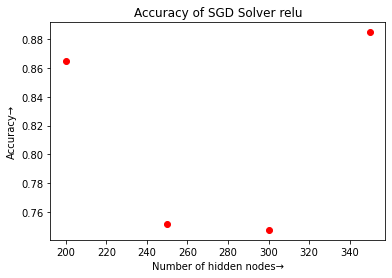

In [19]:
# Now let's plot the accuracy

plt.plot(nohns, accs, 'ro')
plt.xlabel('Number of hidden nodes' + u"\u2192")
plt.ylabel('Accuracy' + u"\u2192")
plt.title('Accuracy of SGD Solver relu')
plt.show()

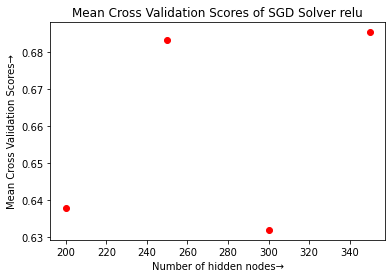

In [20]:
# Now plot cross validation

plt.plot(nohns, cross_vals, 'ro')
plt.xlabel('Number of hidden nodes' + u"\u2192")
plt.ylabel('Mean Cross Validation Scores' + u"\u2192")
plt.title('Mean Cross Validation Scores of SGD Solver relu')
plt.show()

In [21]:
# Clearing the stored values
accs = list()
nohns = list()
cross_vals = list()

In [22]:
train_nerual(200, 'lbfgs', 'tanh')

Fitting the classifier to the training set
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        12
         3.0       1.00      0.88      0.94        17
         4.0       1.00      1.00      1.00        17
         5.0       0.91      0.95      0.93        21
         6.0       1.00      1.00      1.00        15
         7.0       1.00      1.00      1.00        16
         8.0       0.76      1.00      0.87        13
         9.0       1.00      1.00      1.00        19
        11.0       1.00      1.00      1.00        14
        12.0       1.00      1.00      1.00        19
        13.0       1.00      1.00      1.00        15
        15.0       1.00      0.94      0.97        16
        16.0       0.85      0.89      0.87        19
        17.0       1.00      0.90      0.95        20
        18.0       1.00      1.00      1.00        16
        20.0       1.00      0.88      0.93        16
        22.0       1.00      1.00     

In [23]:
train_nerual(250, 'lbfgs', 'tanh')

Fitting the classifier to the training set
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        12
         3.0       1.00      0.88      0.94        17
         4.0       0.94      1.00      0.97        17
         5.0       0.95      0.95      0.95        21
         6.0       1.00      1.00      1.00        15
         7.0       1.00      1.00      1.00        16
         8.0       0.73      0.85      0.79        13
         9.0       0.95      0.95      0.95        19
        11.0       1.00      1.00      1.00        14
        12.0       1.00      1.00      1.00        19
        13.0       1.00      1.00      1.00        15
        15.0       1.00      1.00      1.00        16
        16.0       0.74      0.89      0.81        19
        17.0       1.00      0.80      0.89        20
        18.0       1.00      1.00      1.00        16
        20.0       1.00      0.81      0.90        16
        22.0       1.00      1.00     

In [24]:
train_nerual(300, 'lbfgs', 'tanh')

Fitting the classifier to the training set
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        12
         3.0       1.00      0.94      0.97        17
         4.0       0.94      1.00      0.97        17
         5.0       1.00      0.95      0.98        21
         6.0       1.00      1.00      1.00        15
         7.0       1.00      1.00      1.00        16
         8.0       0.80      0.92      0.86        13
         9.0       0.94      0.84      0.89        19
        11.0       1.00      1.00      1.00        14
        12.0       1.00      1.00      1.00        19
        13.0       1.00      1.00      1.00        15
        15.0       1.00      1.00      1.00        16
        16.0       0.77      0.89      0.83        19
        17.0       0.94      0.80      0.86        20
        18.0       1.00      1.00      1.00        16
        20.0       1.00      0.88      0.93        16
        22.0       1.00      1.00     

In [25]:
train_nerual(350, 'lbfgs', 'tanh')

Fitting the classifier to the training set
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        12
         3.0       1.00      0.88      0.94        17
         4.0       1.00      1.00      1.00        17
         5.0       0.87      0.95      0.91        21
         6.0       1.00      1.00      1.00        15
         7.0       0.94      1.00      0.97        16
         8.0       0.67      0.92      0.77        13
         9.0       1.00      0.84      0.91        19
        11.0       1.00      1.00      1.00        14
        12.0       1.00      1.00      1.00        19
        13.0       1.00      1.00      1.00        15
        15.0       1.00      1.00      1.00        16
        16.0       0.77      0.89      0.83        19
        17.0       1.00      0.80      0.89        20
        18.0       1.00      1.00      1.00        16
        20.0       1.00      0.88      0.93        16
        22.0       1.00      1.00     

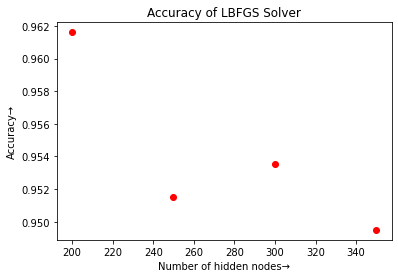

In [26]:
# Now let's plot the accuracy

plt.plot(nohns, accs, 'ro')
plt.xlabel('Number of hidden nodes' + u"\u2192")
plt.ylabel('Accuracy' + u"\u2192")
plt.title('Accuracy of LBFGS Solver')
plt.show()

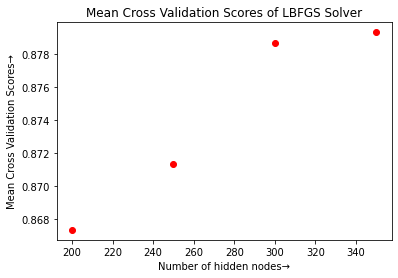

In [27]:
# Now plot cross validation

plt.plot(nohns, cross_vals, 'ro')
plt.xlabel('Number of hidden nodes' + u"\u2192")
plt.ylabel('Mean Cross Validation Scores' + u"\u2192")
plt.title('Mean Cross Validation Scores of LBFGS Solver')
plt.show()

In [28]:
# Clearing the stored values
accs = list()
nohns = list()
cross_vals = list()

In [29]:
train_nerual(200, 'lbfgs', 'relu')

Fitting the classifier to the training set
              precision    recall  f1-score   support

         2.0       0.92      1.00      0.96        12
         3.0       1.00      0.88      0.94        17
         4.0       1.00      1.00      1.00        17
         5.0       0.87      0.95      0.91        21
         6.0       1.00      1.00      1.00        15
         7.0       0.89      1.00      0.94        16
         8.0       0.76      1.00      0.87        13
         9.0       1.00      0.95      0.97        19
        11.0       1.00      0.93      0.96        14
        12.0       1.00      1.00      1.00        19
        13.0       1.00      1.00      1.00        15
        15.0       1.00      0.94      0.97        16
        16.0       0.77      0.89      0.83        19
        17.0       1.00      0.80      0.89        20
        18.0       1.00      1.00      1.00        16
        20.0       1.00      0.88      0.93        16
        22.0       0.92      1.00     

In [30]:
train_nerual(250, 'lbfgs', 'relu')

Fitting the classifier to the training set
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        12
         3.0       1.00      0.82      0.90        17
         4.0       1.00      1.00      1.00        17
         5.0       0.95      0.95      0.95        21
         6.0       1.00      1.00      1.00        15
         7.0       1.00      1.00      1.00        16
         8.0       0.71      0.92      0.80        13
         9.0       1.00      0.89      0.94        19
        11.0       1.00      1.00      1.00        14
        12.0       1.00      1.00      1.00        19
        13.0       1.00      1.00      1.00        15
        15.0       1.00      1.00      1.00        16
        16.0       0.77      0.89      0.83        19
        17.0       1.00      0.80      0.89        20
        18.0       1.00      1.00      1.00        16
        20.0       1.00      0.88      0.93        16
        22.0       1.00      1.00     

In [31]:
train_nerual(300, 'lbfgs', 'relu')

Fitting the classifier to the training set
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        12
         3.0       1.00      0.88      0.94        17
         4.0       1.00      1.00      1.00        17
         5.0       1.00      0.95      0.98        21
         6.0       1.00      1.00      1.00        15
         7.0       1.00      1.00      1.00        16
         8.0       0.76      1.00      0.87        13
         9.0       1.00      0.79      0.88        19
        11.0       1.00      0.93      0.96        14
        12.0       1.00      1.00      1.00        19
        13.0       1.00      1.00      1.00        15
        15.0       1.00      1.00      1.00        16
        16.0       0.85      0.89      0.87        19
        17.0       0.94      0.80      0.86        20
        18.0       1.00      1.00      1.00        16
        20.0       1.00      0.88      0.93        16
        22.0       0.92      1.00     

In [32]:
train_nerual(350, 'lbfgs', 'relu')

Fitting the classifier to the training set
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        12
         3.0       1.00      0.88      0.94        17
         4.0       1.00      1.00      1.00        17
         5.0       0.95      0.95      0.95        21
         6.0       1.00      1.00      1.00        15
         7.0       0.94      1.00      0.97        16
         8.0       0.81      1.00      0.90        13
         9.0       1.00      0.79      0.88        19
        11.0       1.00      1.00      1.00        14
        12.0       1.00      1.00      1.00        19
        13.0       1.00      1.00      1.00        15
        15.0       1.00      1.00      1.00        16
        16.0       0.85      0.89      0.87        19
        17.0       1.00      0.80      0.89        20
        18.0       1.00      1.00      1.00        16
        20.0       1.00      0.81      0.90        16
        22.0       1.00      1.00     

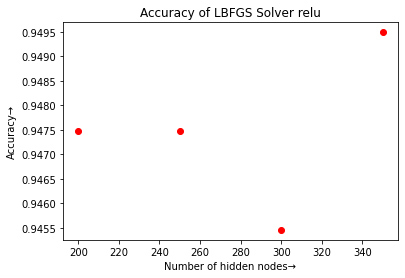

In [33]:
# Now let's plot the accuracy

plt.plot(nohns, accs, 'ro')
plt.xlabel('Number of hidden nodes' + u"\u2192")
plt.ylabel('Accuracy' + u"\u2192")
plt.title('Accuracy of LBFGS Solver relu')
plt.show()

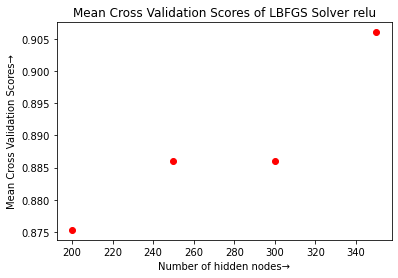

In [34]:
# Now plot cross validation

plt.plot(nohns, cross_vals, 'ro')
plt.xlabel('Number of hidden nodes' + u"\u2192")
plt.ylabel('Mean Cross Validation Scores' + u"\u2192")
plt.title('Mean Cross Validation Scores of LBFGS Solver relu')
plt.show()